**Machine Learning Tasks and Models for Sales Dataset**

The Dataset has the following columns;

**Product_ID, Sale_Date, Sales_Rep, Region**

**Sales_Amount** – total revenue from the sale

**Quantity_Sold, Unit_Cost, Unit_Price**

**Product_Category, Customer_Type, Discount**

**Payment_Method, Sales_Channel**

**Region_and_Sales_Rep** (combined)

**1. Predicting Sales_Amount (Regression)**

Model: **Random Forest Regressor**

This will help us understand what drives sales (e.g., discount, quantity, customer type).

In [5]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
#Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
#Encodes categorical variables into numeric format
from sklearn.preprocessing import OneHotEncoder
#Allows to apply different preprocessing steps to different columns
from sklearn.compose import ColumnTransformer
#Chains together all preprocessing and modeling steps into one seamless workflow
from sklearn.pipeline import Pipeline
#Provides tools to evaluate your model’s performance
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
df=pd.read_csv("C:/Users/NEPHIC  840G3/Desktop/FYJ/DATA_ANALYSIS FILES/sales_data.csv")

In [7]:
# Features and target
X = df[['Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount',
        'Customer_Type', 'Product_Category', 'Sales_Channel']]
y = df['Sales_Amount']

# Encode categoricals
categorical_cols = ['Customer_Type', 'Product_Category', 'Sales_Channel']
numeric_cols = ['Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')
model = Pipeline([
    ("prep", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: -0.06602066304565679
RMSE: 3138.700281772964


**Interpretation of Results**

**R² Score: -0.066**

This is a very low score, and since it’s negative, it actually means the model is worse than just predicting the mean **Sales_Amount** for every row.
In simple terms, the model is not learning anything useful from the features — it’s not capturing the relationship between predictors (e.g., Quantity_Sold, Unit_Cost, etc.) and Sales_Amount.

**RMSE: 3138.70**

This value shows the average error in the model’s predictions is about 3,139 currency units.
On its own, this isn't meaningful unless compared to the scale of typical sales. If the average **Sales_Amount** is around that level, the model isn’t much better than guessing

**2.Predicting Revenue (Regression Task)**

**Model: Random Forest Regressor**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#Creating Revenue column
df['Revenue']=(df['Unit_Price']*df['Quantity_Sold'])*(1-df['Discount'])
# Feature engineering
df['Profit_Margin'] = df['Profit'] / df['Revenue']

# Select features and target
features = ['Quantity_Sold', 'Unit_Price', 'Unit_Cost', 'Profit_Margin']
X = df[features]
y = df['Revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9707283962889854
RMSE: 8260.538231964289


**Interpretation of Model Results**

**R² Score: 0.9707**

This is a **very high score** — it means that about 97.1% of the variation in **Revenue** is explained by the features used (like Quantity_Sold, Unit_Price, Unit_Cost, etc.).
In practical terms: The model is doing an excellent job at predicting revenue from the available input data.

**RMSE: 8,260.54**

This is the average prediction error in the same units as the sales figures.
An RMSE of 8,260 is acceptable if typical Revenue values are much higher (e.g. in the tens or hundreds of thousands). If average sales are closer to this number, then this is a relatively high error.

**Recommendations**

**Use this model to automate revenue estimation:**
This can be use to deploy the model to estimate expected revenue in real-time using transactional inputs (like units sold, unit price, discounts, etc.).
Useful for dashboards, sales forecasting, and scenario analysis.

**2. Predicting High vs Low Sales Volume (Classification)**

**Model: Logistic Regression**

This model classifies whether a transaction had high (1) or low (0) Quantity_Sold.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create binary outcome
df['High_Sales_Volume'] = (df['Quantity_Sold'] > df['Quantity_Sold'].median()).astype(int)
X = df[['Unit_Cost', 'Unit_Price', 'Discount', 'Customer_Type']]
y = df['High_Sales_Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = Pipeline([
    ('prep', ColumnTransformer([
        ('cat', OneHotEncoder(drop='first'), ['Customer_Type'])
    ], remainder='passthrough')),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51       130
           1       0.47      0.47      0.47       120

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250



**Interpretation of Results**

| Metric        | Score                          |
| ------------- | ------------------------------ |
| **Accuracy**  | 0.49                           |
| **Precision** | 0.51 (class 0), 0.47 (class 1) |
| **Recall**    | 0.52 (class 0), 0.47 (class 1) |
| **F1-Score**  | \~0.49 overall                 |

What this means:

The model is only **49% accurate**, which is close to random guessing for a binary classification task.
Both classes (0 = low sales volume, 1 = high sales volume) are **not being clearly separated** by the features used.
The **precision and recall** are low for both classes, indicating that the model struggles to correctly identify either class

**Recommendations**

**Improve feature quality**-
Include more relevant features like **Product_Category**, **Customer_Type**, or **Sales_Channel** using one-hot encoding.
Consider adding interaction features like **Price × Discount**, or **Discount %**.

**Use a more powerful classifier**-
Trying models like **Random Forest** which can capture non-linear relationships better than Logistic Regression.

**Visualize the data**-

Plot distributions of **Quantity_Sold** across different product categories or channels.
Check if high-volume and low-volume sales are actually separable based on the features

**4. Customer Segmentation (Clustering)**

**Model: KMeans**

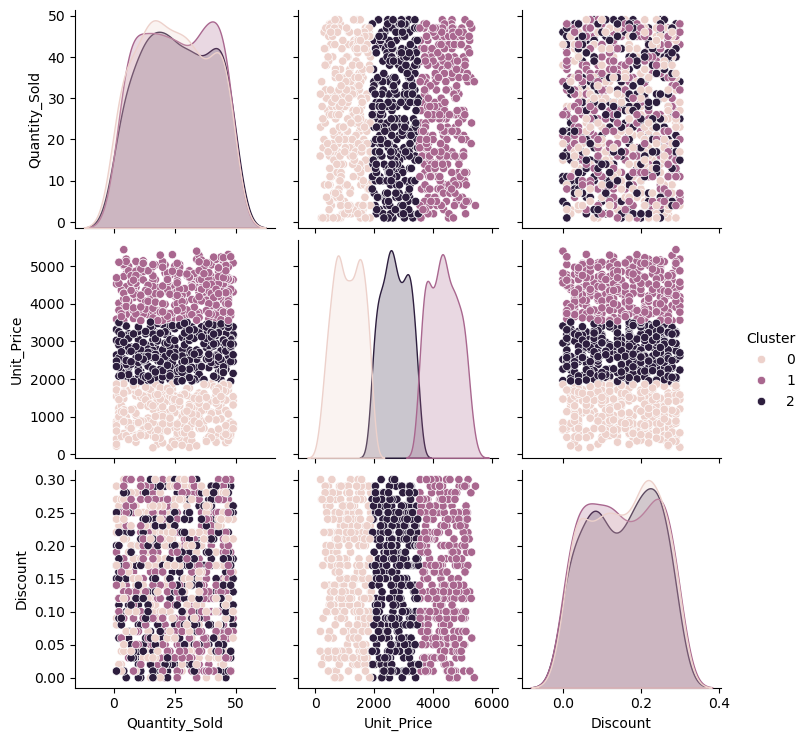

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster based on relevant metrics
cluster_data = df[['Quantity_Sold', 'Unit_Price', 'Discount']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Quantity_Sold', 'Unit_Price', 'Discount'])
plt.show()

**Interpretation:**

Group 0: Low price, high volume

Group 1: High price, low volume

**Recommendation:**

Tailor pricing or product strategy to each group.

Segment product or region-specific strategies

**5. Sales Forecasting (Time Series)**

**Model: Prophet (based on Sale_Date)**

20:18:43 - cmdstanpy - INFO - Chain [1] start processing
20:18:43 - cmdstanpy - INFO - Chain [1] done processing


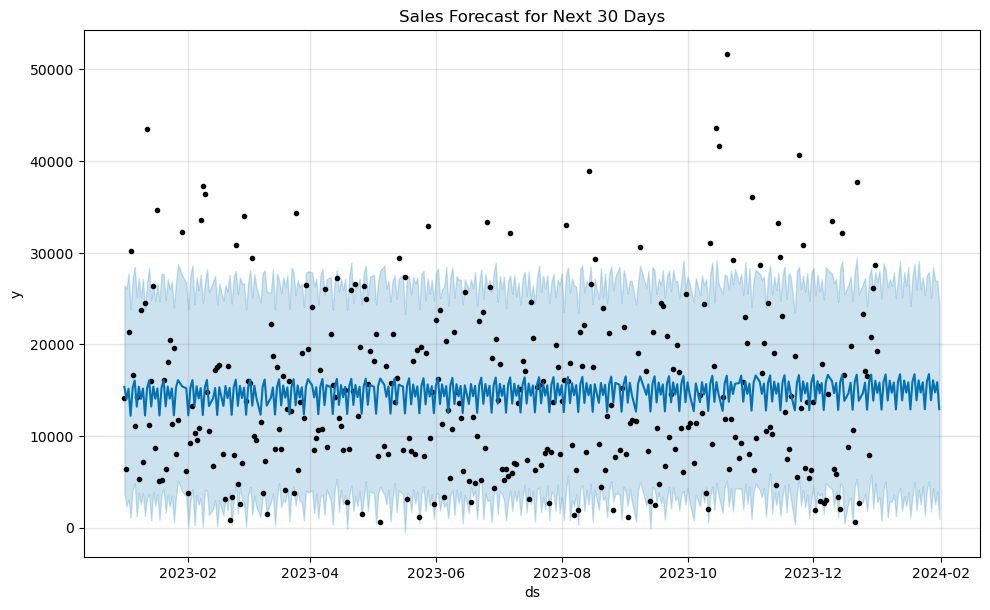

In [16]:
from prophet import Prophet

# Format date
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%d/%m/%Y')
sales_ts = df.groupby('Sale_Date').agg({'Sales_Amount': 'sum'}).reset_index()
sales_ts.columns = ['ds', 'y']

# Train Prophet
model = Prophet()
model.fit(sales_ts)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title('Sales Forecast for Next 30 Days')
plt.show()

**Interpretation of the Forecast Plot**

The **black dots** represent the actual historical sales data (Sales_Amount) over time.
The **dark blue line** shows the model's forecasted trend of sales.
The **light blue shaded area** is the uncertainty interval (the wider it is, the less confident the model is).

What the model is showing:

Sales are **fairly flat and stable** over time — there's no clear upward or downward trend.
The forecast for the next 30 days stays around the same average level as historical sales (likely between 10,000–15,000 per day, based on the y-axis).
There’s significant variability in actual historical sales (some days go beyond 50,000 or near zero), but the model smooths that out into an average trend.

**Recommendations**

**Use this forecast for daily or weekly planning:**-Helps with staffing, stock replenishment, and delivery logistics.
It can also be use to prepare for an average daily revenue in the forecast window

**Refine the model with additional signals:**
Prophet works best when seasonality or special events are added e.g., promotions, holidays, etc..
Accuracy can be enhance by adding features like:
monthly, weekly seasonality and
custom holidays (e.g., Black Friday, back-to-school)